# Create multi-label model using miml dataset 

In [2]:
%tensorflow_version 1.x

import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import SGD
from keras.callbacks import ModelCheckpoint
from keras.applications.vgg19 import VGG19
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.models import Model

from keras.layers import Input
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import hamming_loss
from keras.optimizers import Adam
from keras.applications.resnet50 import ResNet50

keras.backend.set_image_data_format('channels_first')


import h5py
from sklearn.model_selection import train_test_split

def load():
    f = h5py.File("dataset.h5")
    x = f['x'].value
    y = f['y'].value
    f.close()
    x_train , x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=100)
    return x_train, x_test, y_train, y_test

TensorFlow 1.x selected.


Using TensorFlow backend.


In [4]:
x_train, x_test, y_train, y_test = load()
print(x_train.shape)
x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')
x_train /= 255
x_test /= 255


NUM_CLASSES = 5

#Data augumentation with Keras tools
from keras.preprocessing.image import ImageDataGenerator
img_gen = ImageDataGenerator(
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
    )

net = ResNet50(include_top=False, weights='imagenet', input_shape=(3, 100, 100))

x = net.output
x = Flatten()(x)
x = Dropout(0.5)(x)
output_layer = Dense(NUM_CLASSES, activation='sigmoid', name='sigmoid')(x)
net_final = Model(inputs=net.input, outputs=output_layer)


net_final.compile(optimizer=Adam(lr=1e-5), loss='binary_crossentropy', metrics=['accuracy'])

History = net_final.fit_generator(img_gen.flow(x_train, y_train, batch_size = 16),
                                      steps_per_epoch = len(x_train)/16, validation_data = (x_test,y_test), epochs = 2 )

#net_final.save('best_miml')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.


(1600, 3, 100, 100)


/tensorflow-1.15.2/python3.6/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/numpy_array_iterator.py:136: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1600, 3, 100, 100) (100 channels).
  str(self.x.shape[channels_axis]) + ' channels).')


Epoch 1/2
100/100 [==============================] - 18s 184ms/step - loss: 0.9131 - accuracy: 0.6431 - val_loss: 1.0435 - val_accuracy: 0.7515
Epoch 2/2
100/100 [==============================] - 11s 106ms/step - loss: 0.6574 - accuracy: 0.7470 - val_loss: 6.7221 - val_accuracy: 0.5435


**Inference using test image**

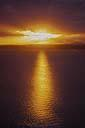

Instructions for updating:
`normal` is a deprecated alias for `truncated_normal`


array([[8.4429979e-05, 5.0574541e-04, 6.2945890e-01, 9.9974477e-01,
        2.7086702e-03]], dtype=float32)

In [5]:
import cv2
from google.colab.patches import cv2_imshow
from tensorflow import keras
import numpy as np


img = cv2.imread("test_image.jpg")
cv2_imshow(img)

net_final = keras.models.load_model('best_miml')

img = cv2.resize(img,(100,100))
img = img.transpose((2,0,1))
img = img.astype('float32')
img = img/255
img = np.expand_dims(img,axis=0)
img.shape
pred = net_final.predict(img)
pred
